In [1]:
print("OK!")

OK!


In [2]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)   

In [4]:
ticker = "GOOG"
stock_data = yf.download(ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [6]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2004-08-19 to 2024-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5020 non-null   float64
 1   High       5020 non-null   float64
 2   Low        5020 non-null   float64
 3   Close      5020 non-null   float64
 4   Adj Close  5020 non-null   float64
 5   Volume     5020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.5 KB


In [8]:
stock_data.shape

(5020, 6)

In [9]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5.020000e+03
mean,45.251315,45.728793,44.800587,45.274515,45.224493,1.157539e+08
std,43.338635,43.818298,42.918167,43.377299,43.332534,1.497936e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.034705,13.145415,12.881592,13.032090,13.017277,2.733950e+07
50%,26.982210,27.194902,26.791387,27.005927,26.975230,5.585480e+07
75%,60.215126,60.758375,59.811811,60.280252,60.211734,1.425333e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


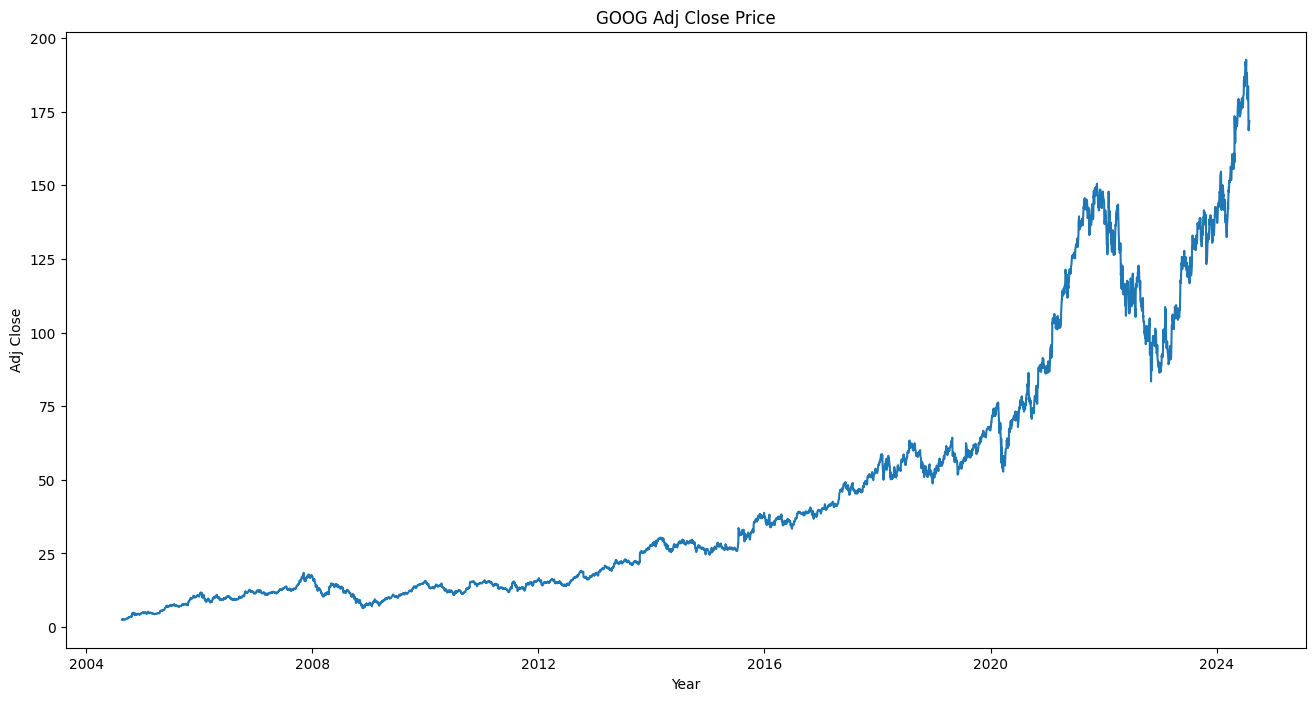

In [10]:
plt.figure(figsize=(16,8))
plt.plot(stock_data['Adj Close'])
plt.title(f'{ticker} Adj Close Price')
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.show()

In [11]:
def plot_stock(figSize, stock_close_data, column_name):
    plt.figure(figsize=figSize)
    plt.plot(stock_close_data)
    plt.legend(stock_close_data)
    plt.title(f'{column_name} price of {ticker}')
    plt.xlabel('Year')
    plt.ylabel(column_name)
    plt.show()

In [12]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

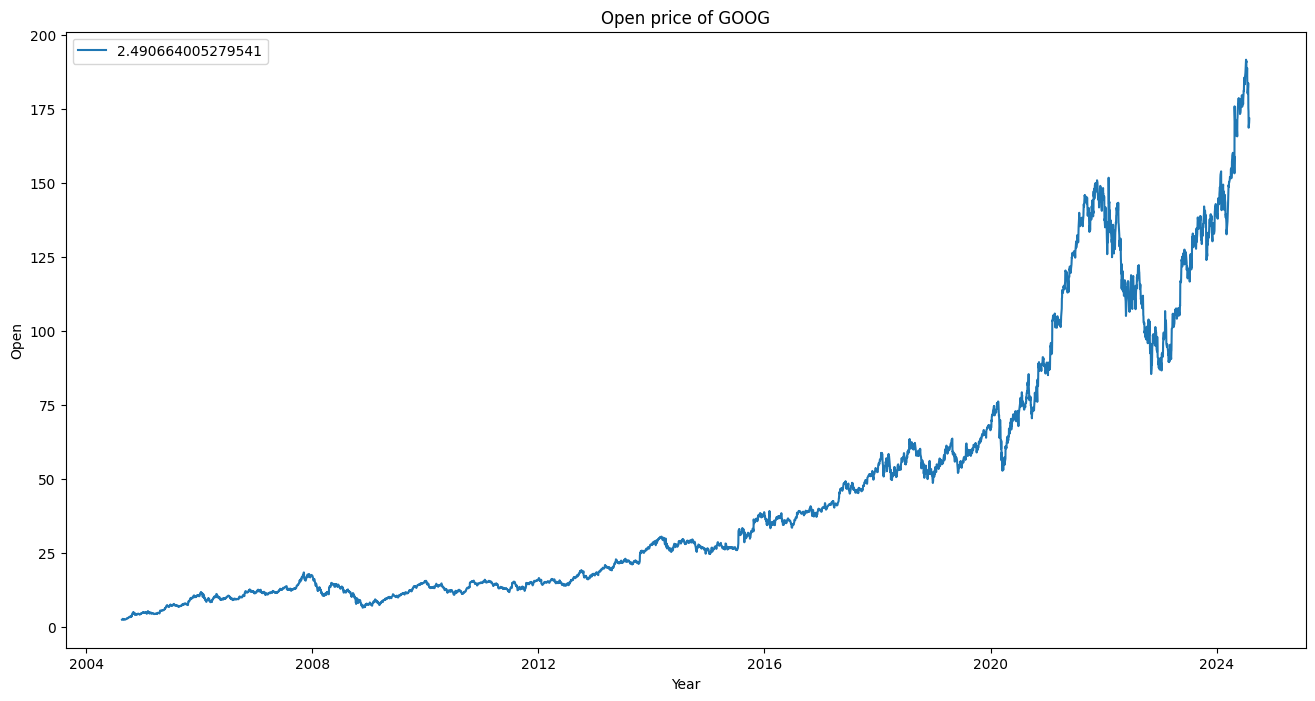

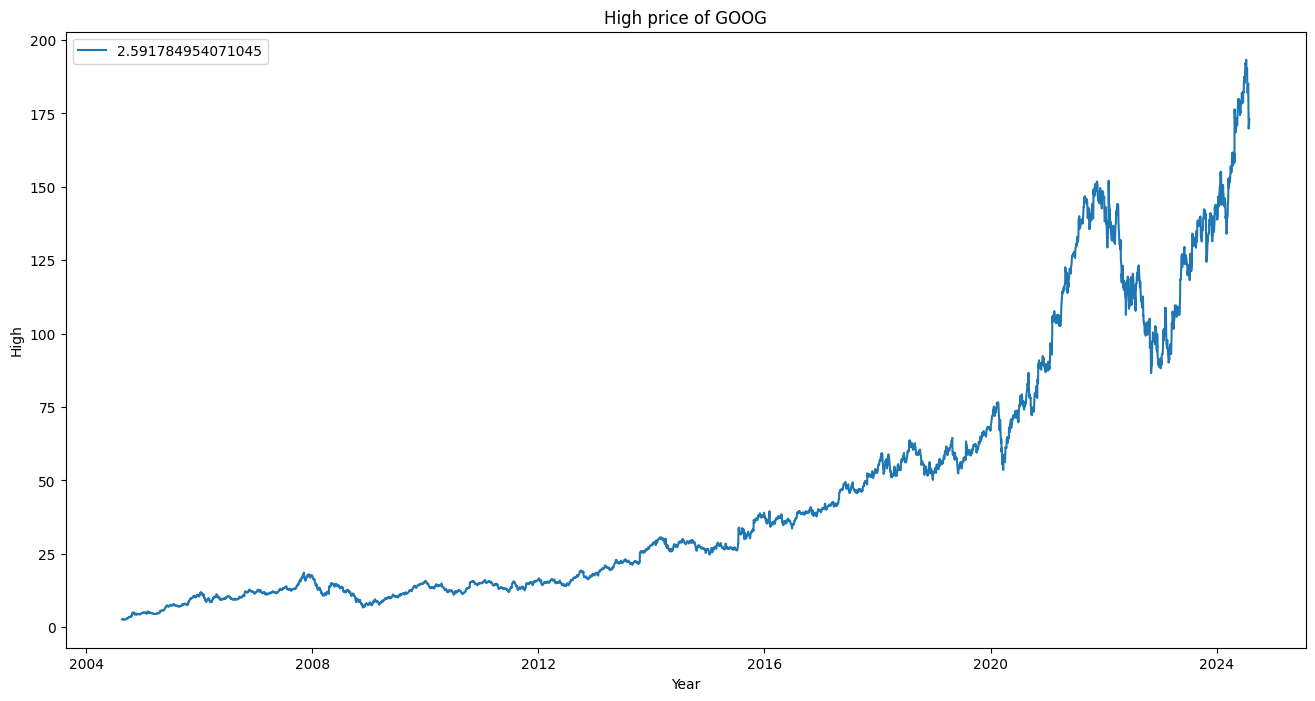

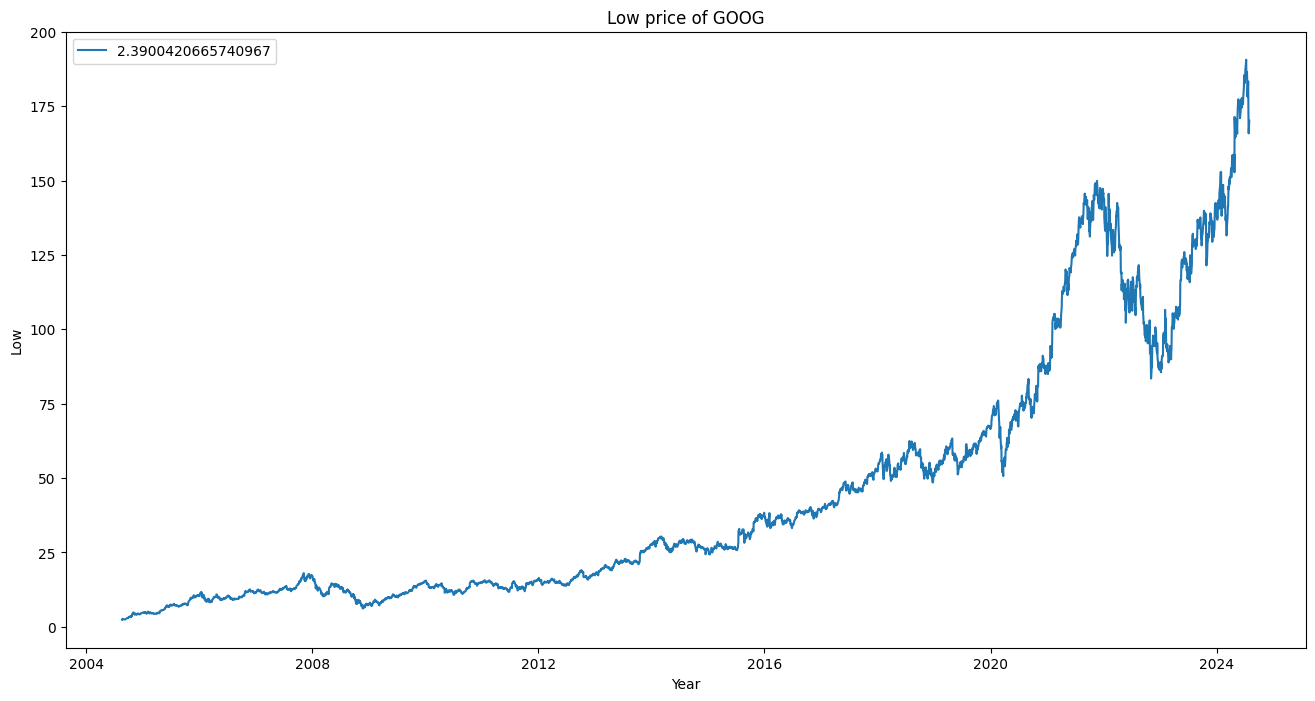

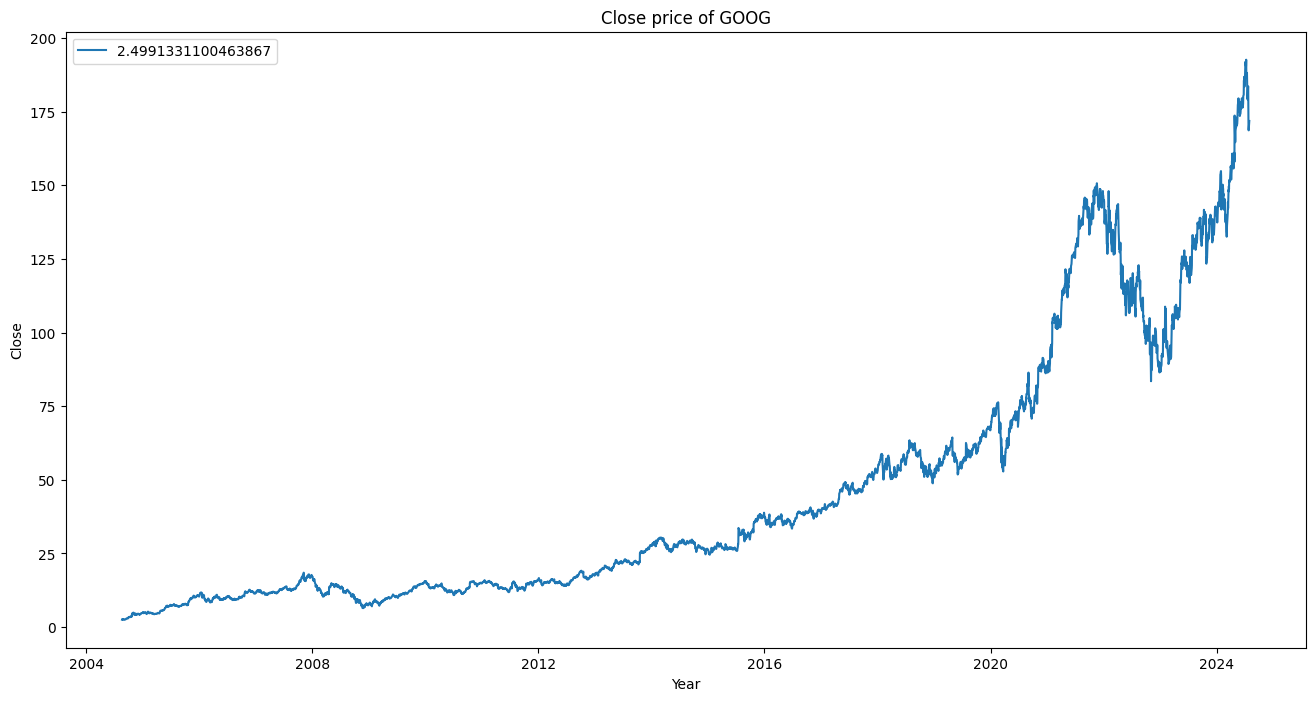

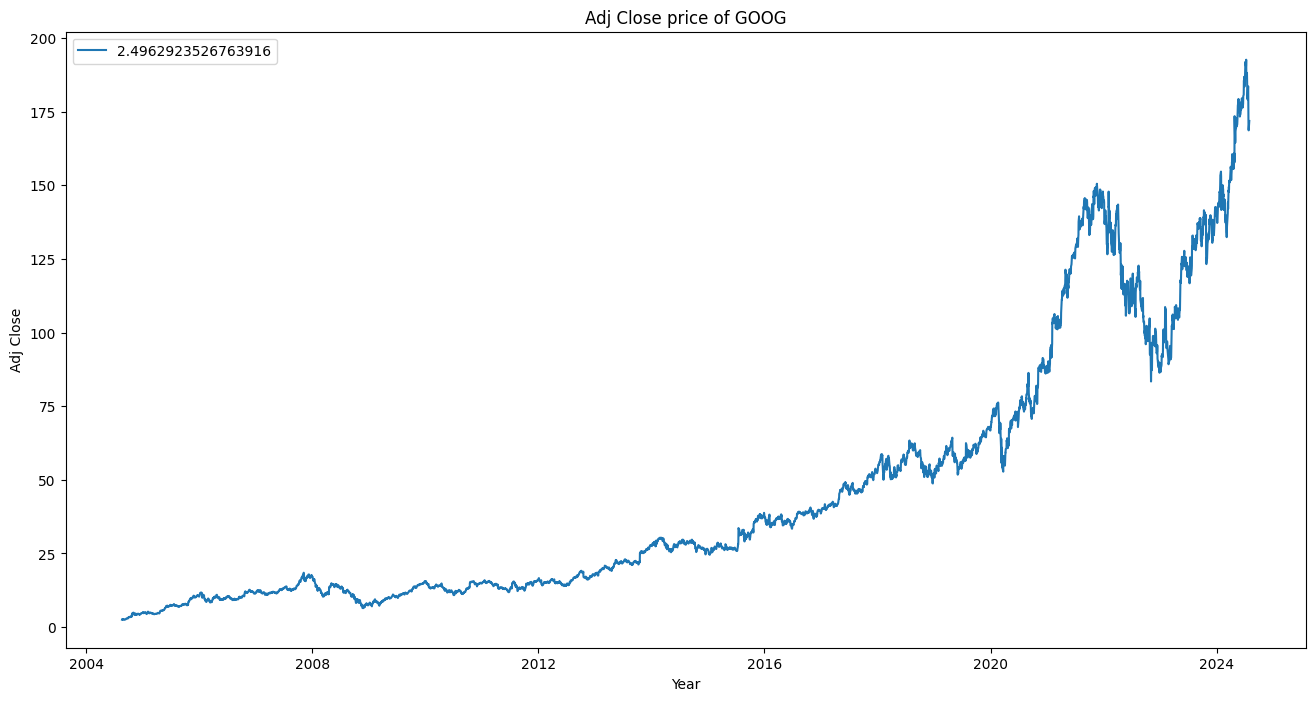

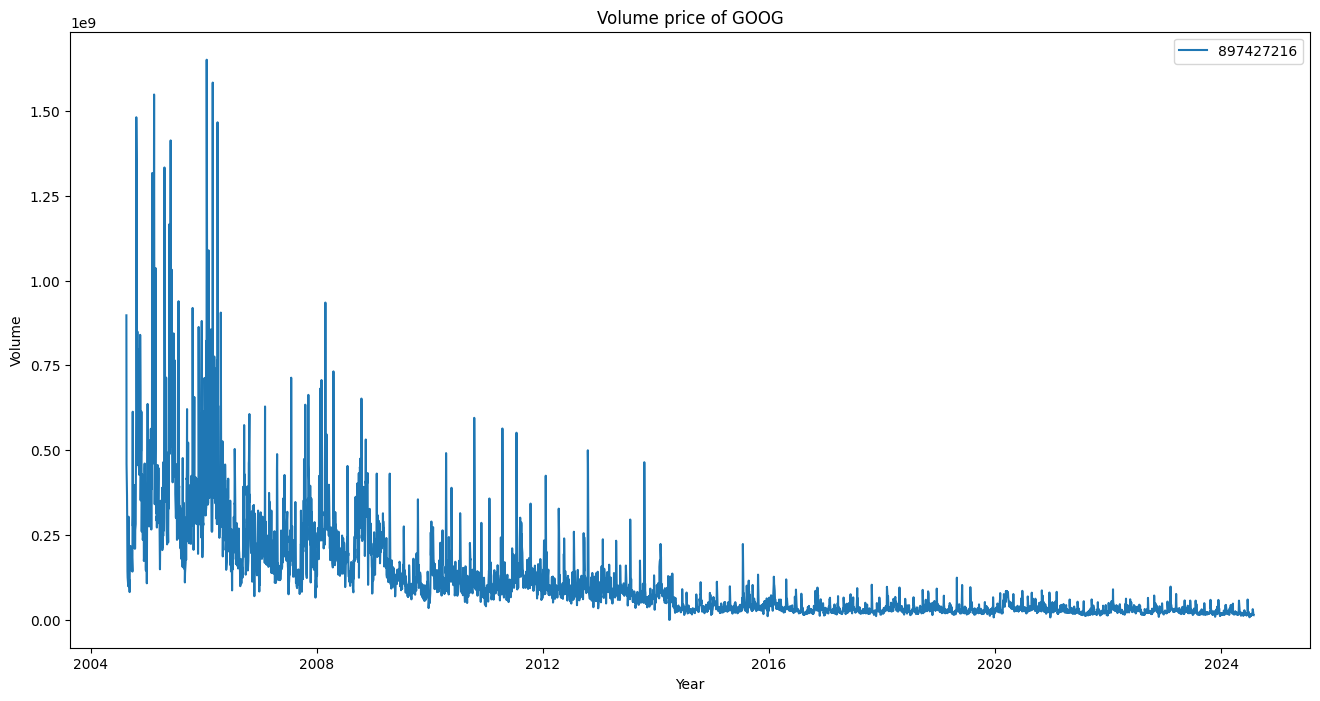

In [13]:
for column in stock_data.columns:
    plot_stock((16,8), stock_data[column], column)

In [14]:
list(stock_data.index.year)

[2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,

In [15]:
for i in range(2004, 2025):
    print(i, list(stock_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 145


In [16]:
stock_data['MA_250'] = stock_data['Adj Close'].rolling(250).mean()

In [17]:
stock_data['MA_250']

Date
2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
                 ...    
2024-07-24    149.216608
2024-07-25    149.374359
2024-07-26    149.517644
2024-07-29    149.670329
2024-07-30    149.830809
Name: MA_250, Length: 5020, dtype: float64

In [18]:
stock_data['MA_250'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_250, dtype: float64

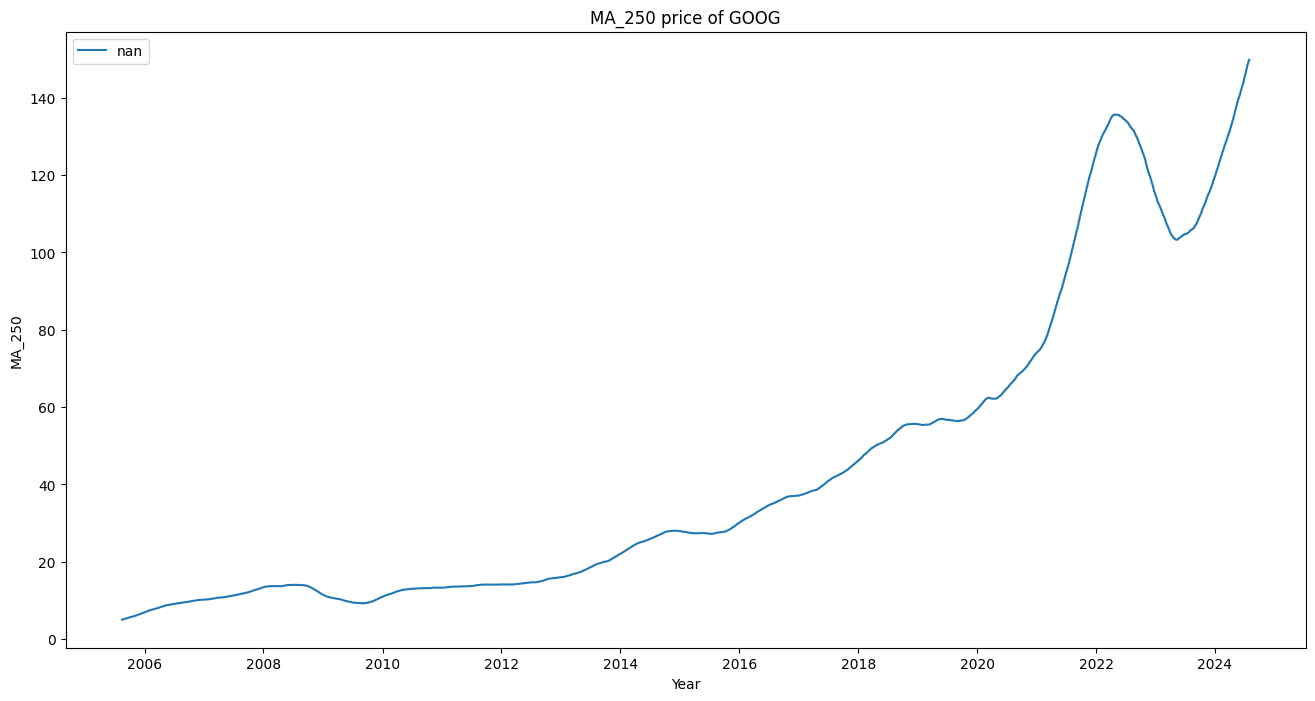

In [19]:
plot_stock((16,8), stock_data['MA_250'], 'MA_250')

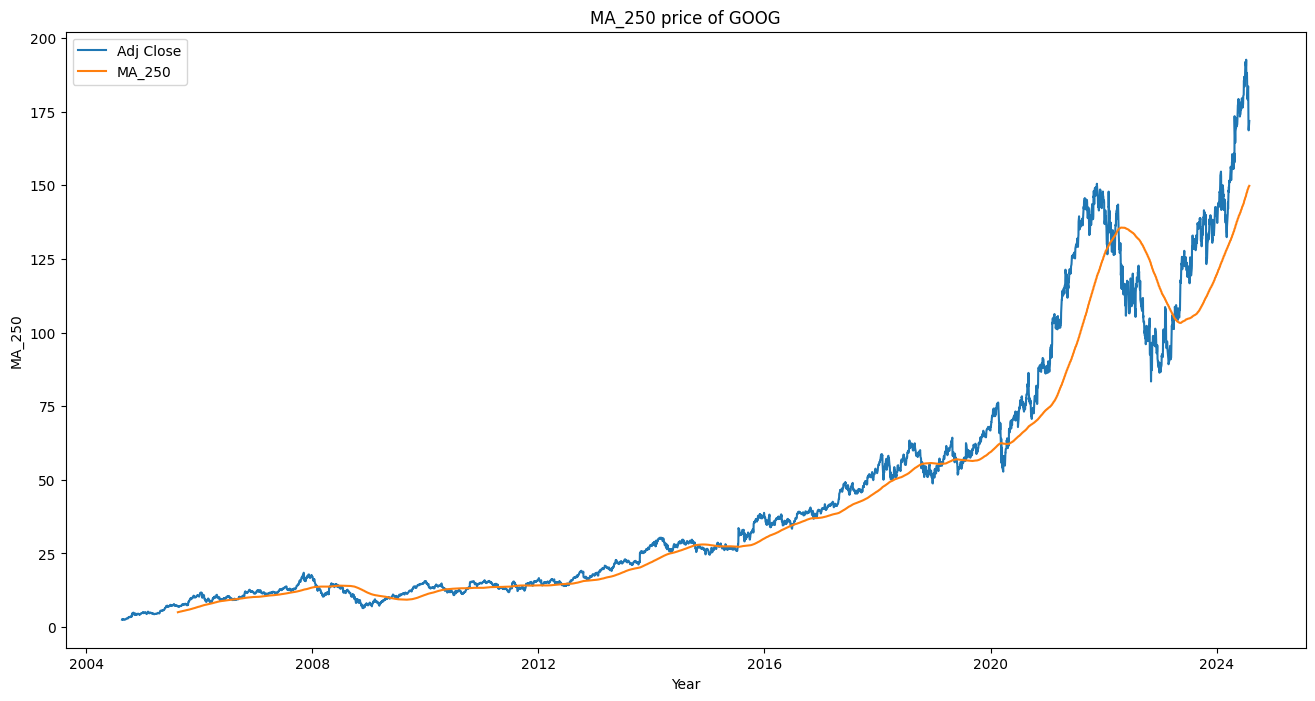

In [20]:
plot_stock((16,8), stock_data[['Adj Close', 'MA_250']], 'MA_250')

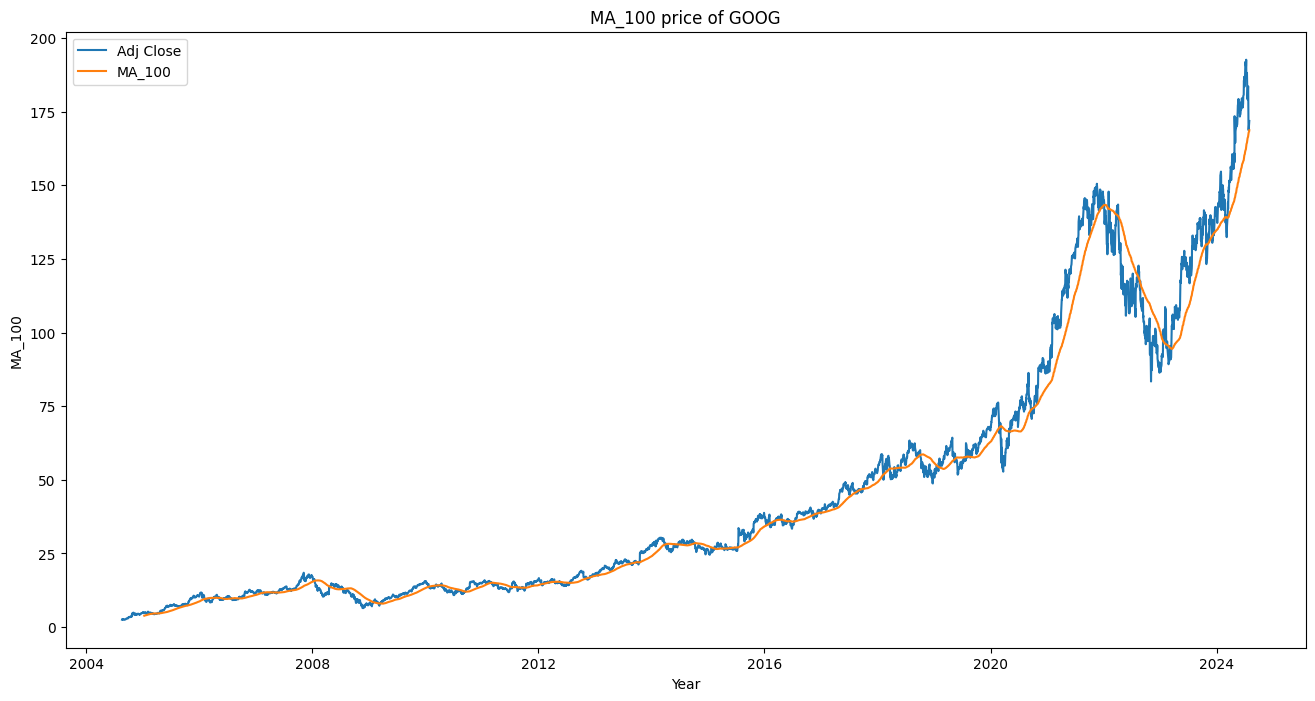

In [21]:
stock_data['MA_100'] = stock_data['Adj Close'].rolling(100).mean()
plot_stock((16,8), stock_data[['Adj Close', 'MA_100']], 'MA_100')

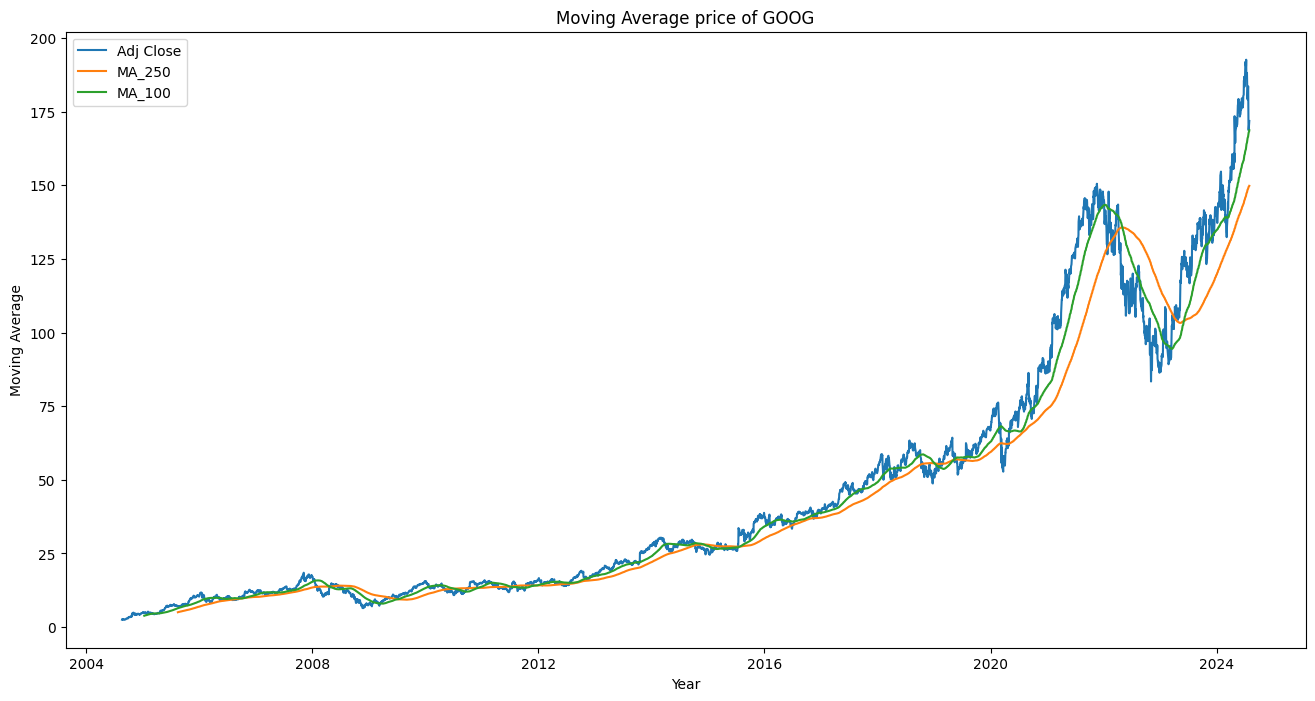

In [22]:
plot_stock((16,8), stock_data[['Adj Close', 'MA_250', 'MA_100']], 'Moving Average')

In [23]:
stock_data['pct_change'] = stock_data['Adj Close'].pct_change()
stock_data[['Adj Close', 'pct_change']]

,Adj Close,pct_change
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775
...,...,...
2024-07-24,174.369995,-0.050272
2024-07-25,169.160004,-0.029879
2024-07-26,168.679993,-0.002838


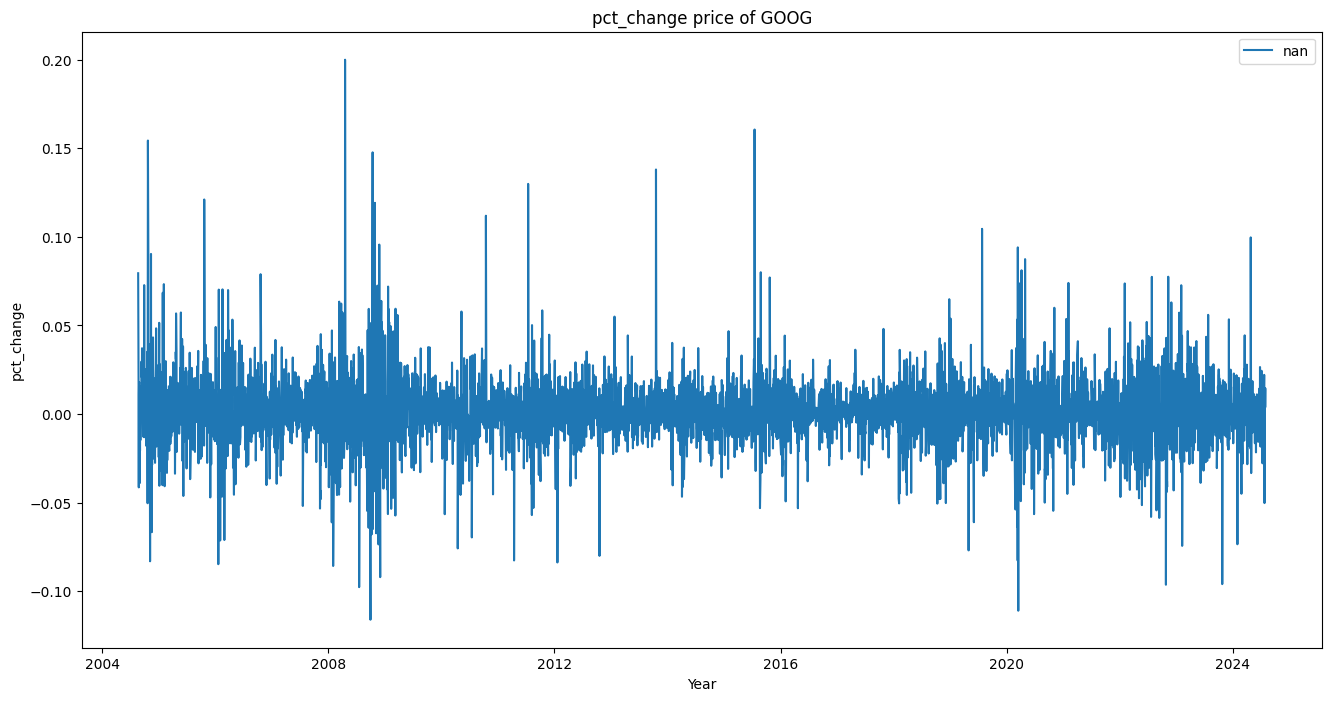

In [24]:
plot_stock((16,8), stock_data['pct_change'], 'pct_change')

In [25]:
Adj_Close = stock_data[['Adj Close']]
max(Adj_Close.values), min(Adj_Close.values)

(array([192.66000366]), array([2.48808169]))

In [26]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(Adj_Close)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [8.73903515e-01],
       [8.86786658e-01],
       [8.90625268e-01]])

In [27]:
len(scaled_data)

5020

In [28]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

In [29]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [30]:
x_data.shape, y_data.shape

((4920, 100, 1), (4920, 1))

In [31]:
x_data[0], y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [32]:
int(len(x_data) * 0.7)

3444

In [33]:
4919-100-int(len(x_data) * 0.7)

1375

In [34]:
splitting_len = int(len(x_data) * 0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [35]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3444, 100, 1) (3444, 1) (1476, 100, 1) (1476, 1)


In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.summary()


d:\Programming\Python\Projects\Stock Price\stockprice\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 107s 30ms/step - loss: 2.0041e-04
Epoch 2/2
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 160s 46ms/step - loss: 4.6369e-05


In [39]:
predictions = model.predict(x_test)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


array([[0.2938772 ],
       [0.29125765],
       [0.29023683],
       ...,
       [0.86043507],
       [0.847795  ],
       [0.8541265 ]], dtype=float32)

## Inverse Transform

In [40]:
inversed_predictions = scalar.inverse_transform(predictions)
inversed_predictions

array([[ 58.37528],
       [ 57.87711],
       [ 57.68298],
       ...,
       [166.11867],
       [163.71489],
       [164.91896]], dtype=float32)

In [41]:
y_test

array([[0.29051986],
       [0.2918776 ],
       [0.29446967],
       ...,
       [0.87390351],
       [0.88678666],
       [0.89062527]])

In [42]:
inverse_y_test = scalar.inverse_transform(y_test)
inverse_y_test

array([[ 57.73680115],
       [ 57.99500656],
       [ 58.48794556],
       ...,
       [168.67999268],
       [171.13000488],
       [171.86000061]])

In [43]:
rmse = np.sqrt(np.mean(((inversed_predictions - inverse_y_test) ** 2)))
rmse

3.459832134813256

In [44]:
ploting_data = pd.DataFrame({'Prediction': inversed_predictions.ravel(), 'Actual': inverse_y_test.ravel()}, 
                            index=stock_data.index[splitting_len+100:])
ploting_data.head()

,Prediction,Actual
Date,,
2018-09-17,58.375278,57.736801
2018-09-18,57.877110,57.995007
2018-09-19,57.682980,58.487946
2018-09-20,57.895962,59.276043
2018-09-21,58.458366,58.238228


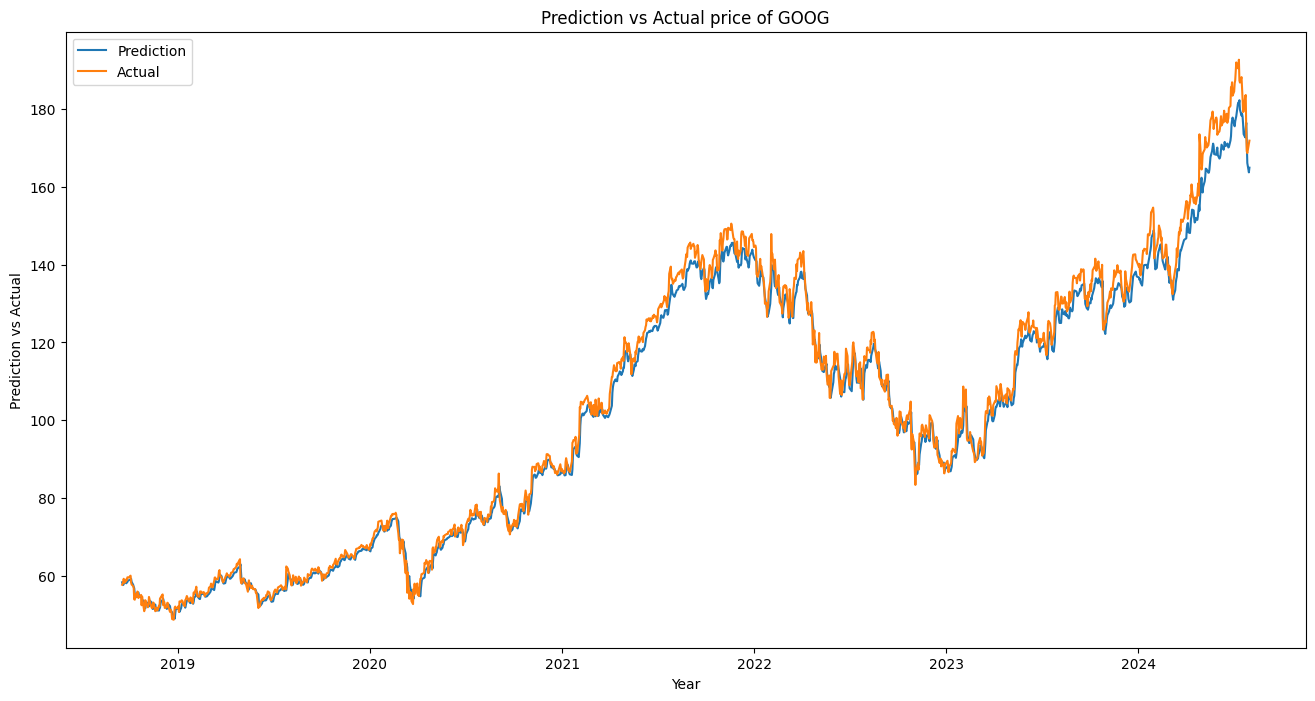

In [45]:
plot_stock((16,8), ploting_data, 'Prediction vs Actual')

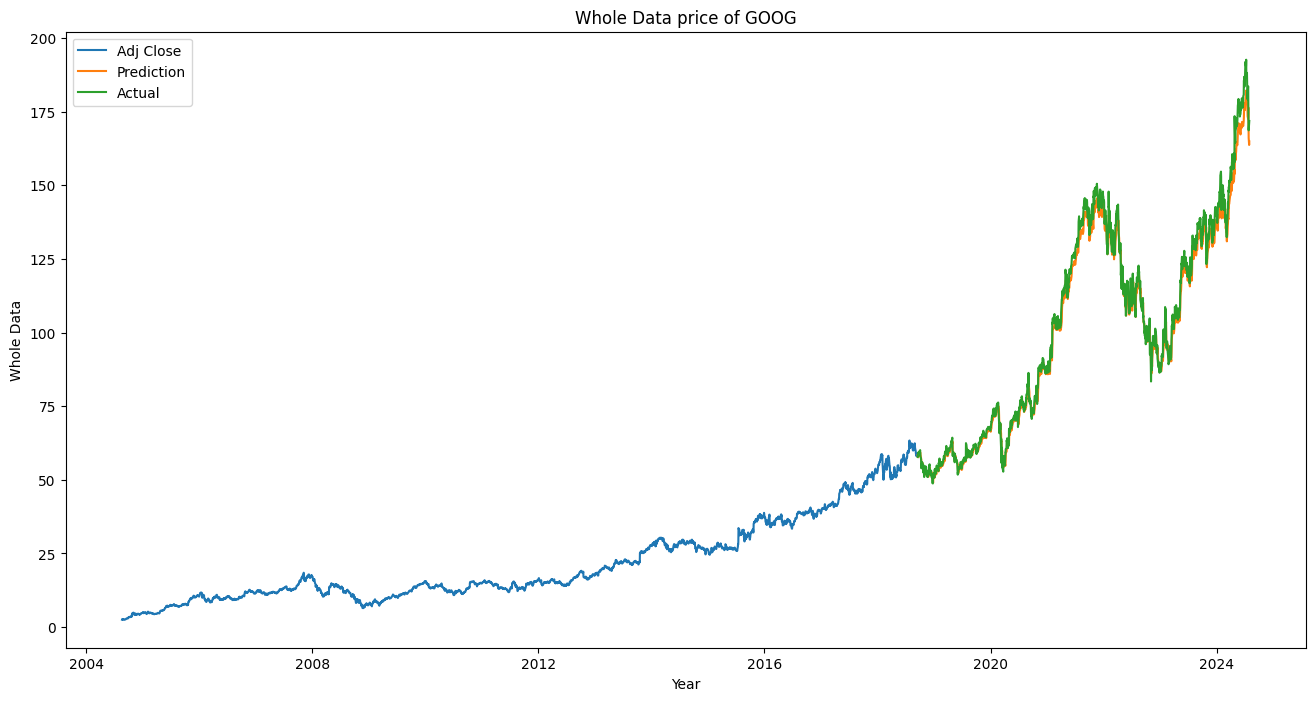

In [46]:
plot_stock((16,8), pd.concat([Adj_Close[:splitting_len+100], ploting_data], axis=0), 'Whole Data')

In [47]:
model.save('Latest_stock_price_model.keras')